In [3]:
from regex import P

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import psycopg2
import requests
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta

from bs4 import BeautifulSoup as BS

In [2]:
import sqlite3

In [4]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Specifications_PDrons2"""
df = pd.read_sql_query(sql, con=DB)
omg3 = df.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(omg3)

spec_key   Akumuliatoriaus tipas: Apsauga nuo per didelės iškrovos:  \
product_id                                                            
1                             NaN                               NaN   
2                             NaN                               NaN   
3                             NaN                               NaN   
4                             NaN                               NaN   
5                             NaN                               NaN   
...                           ...                               ...   
240                           NaN                               NaN   
241                           NaN                               NaN   
242                           NaN                               NaN   
243                           NaN                               NaN   
244                           NaN                               NaN   

spec_key   Apsauga nuo perkaitimo: Apsauga nuo perkrovos: Celių technologija

In [5]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_PDrons2"""
df3 = pd.read_sql_query(sql, con=DB)
# omg = df.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(df3)

      id                                              price      brand  \
0      1  59\n00\n \n€\n \n\n\n\n                79\n31\...     4Hawks   
1      2  33\n69\n \n€\n \n\n\n\n                43\n99\...       None   
2      3  299\n99\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...        DJI   
3      4  81\n00\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n   ...       None   
4      5  101\n91\n \n€\n \n\n\n\n                119\n9...    Avernus   
..   ...                                                ...        ...   
239  240                                               None  Hover Air   
240  241                                               None  Hover Air   
241  242                                               None        DJI   
242  243                                               None        DJI   
243  244                                               None  Hover Air   

                                        brandI  
0                              Allnoel E95 Pro  
1            

In [6]:
p = df3['price'].values.tolist()
kainos = []
for l in p:
    if l:
        f = l.split('€')[0]
        kainos.append(float(f.replace('\n\n','').replace('\n','.').replace('. .','').replace(' ','')))
    else:
        kainos.append(-1)

df3['price'] = kainos
print(df3['price'])

0       59.00
1       33.69
2      299.99
3       81.00
4      101.91
        ...  
239     -1.00
240     -1.00
241     -1.00
242     -1.00
243     -1.00
Name: price, Length: 244, dtype: float64


In [7]:
dfI = df3.merge(omg3 , left_on='id', right_on='product_id')
print(dfI)

      id   price      brand                                     brandI  \
0      1   59.00     4Hawks                            Allnoel E95 Pro   
1      2   33.69       None                 Toy 4K HD D88 E88 PRO WIFI   
2      3  299.99        DJI                                DJI Mini 4K   
3      4   81.00       None                             Dronas E90 PRO   
4      5  101.91    Avernus                          Dronas S1S 4k UHD   
..   ...     ...        ...                                        ...   
237  240   -1.00  Hover Air              HoverAir X1 Combo Plus Retail   
238  241   -1.00  Hover Air                   HoverAir X1 Combo Retail   
239  242   -1.00        DJI    DJI Mavic 3 Classic (CP.MA.00000555.01)   
240  243   -1.00        DJI  DJI Mini 2 Fly More Combo DJI Care Bundle   
241  244   -1.00  Hover Air                       HoverAir X1 Standard   

    Akumuliatoriaus tipas: Apsauga nuo per didelės iškrovos:  \
0                      NaN                     

In [8]:
dfI.to_csv('piguDronsI.csv', index=False)

In [50]:
dfI = pd.read_csv('piguDronsI.csv')

In [31]:
dfI

,id,price,brand,brandI,Akumuliatoriaus tipas:,Apsauga nuo per didelės iškrovos:,Apsauga nuo perkaitimo:,Apsauga nuo perkrovos:,Celių technologija:,Darbinė temperatūra:,...,Rūšis:,Skraidymo laikas:,Skrydžio stabilizacija:,Svoris:,Talpa:,Tipas:,Valdymas:,Veikimo atstumas:,Visos šio ženklo prekės:,Įtampa:
0,1,59.00,4Hawks,Allnoel E95 Pro,NaN,NaN,NaN,NaN,NaN,NaN,...,"4Hawks, taip dronai",15,Nenurodyta,NaN,NaN,Dronas,Nuotolinio valdymo pultu,350 m,Visos 4Hawks prekės,NaN
1,2,33.69,NaN,Toy 4K HD D88 E88 PRO WIFI,NaN,NaN,NaN,NaN,NaN,NaN,...,"Nenurodyta, taip dronai",-,Nenurodyta,NaN,NaN,Dronas,Nuotolinio valdymo pultu+VR,-,Visos Nenurodyta prekės,NaN
2,3,299.99,DJI,DJI Mini 4K,NaN,NaN,NaN,NaN,NaN,NaN,...,"DJI, taip dronai",31,Yra,249,NaN,Dronas,Nuotolinio valdymo pultu,10000 m,Visos DJI prekės,NaN
3,4,81.00,NaN,Dronas E90 PRO,NaN,NaN,NaN,NaN,NaN,NaN,...,"Nenurodyta, taip dronai",-,Nėra,NaN,NaN,Dronas,"Išmaniuoju įrenginiu, \t\t\t\t\t Nu...",-,Visos Nenurodyta prekės,NaN
4,5,101.91,Avernus,Dronas S1S 4k UHD,NaN,NaN,NaN,NaN,NaN,NaN,...,"Avernus, taip dronai",18,Nenurodyta,NaN,NaN,Dronas,Nuotolinio valdymo pultu,500 m,Visos Avernus prekės,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,240,-1.00,Hover Air,HoverAir X1 Combo Plus Retail,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hover Air, taip dronai",11,Yra,NaN,NaN,Dronas,Nenurodyta,30 m,Visos Hover Air prekės,NaN
238,241,-1.00,Hover Air,HoverAir X1 Combo Retail,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hover Air, taip dronai",11,Yra,NaN,NaN,Dronas,Nenurodyta,30 m,Visos Hover Air prekės,NaN
239,242,-1.00,DJI,DJI Mavic 3 Classic (CP.MA.00000555.01),NaN,NaN,NaN,NaN,NaN,NaN,...,"DJI, taip dronai",46,Nenurodyta,NaN,NaN,Dronas,Nuotolinio valdymo pultu,-,Visos DJI prekės,NaN
240,243,-1.00,DJI,DJI Mini 2 Fly More Combo DJI Care Bundle,NaN,NaN,NaN,NaN,NaN,NaN,...,"DJI, taip dronai",31,Nenurodyta,249,NaN,Dronas,Nuotolinio valdymo pultu,-,Visos DJI prekės,NaN


In [12]:
dfI['Skraidymo laikas:'] = dfI['Skraidymo laikas:'].str.replace('min.','')

In [13]:
print(dfI['Skraidymo laikas:'])

0      15 
1       - 
2      31 
3       - 
4      18 
      ... 
237    11 
238    11 
239    46 
240    31 
241    11 
Name: Skraidymo laikas:, Length: 242, dtype: object


In [52]:
dfI['Pakuotės išmatavimai ir svoris (1):'] = dfI['Pakuotės išmatavimai ir svoris (1):'].astype(str).str.replace('kg','').str.split('m,').str[1]

In [53]:
print(dfI['Pakuotės išmatavimai ir svoris (1):']) 
# 0,25 x 0,2 x 0,055 m, 0,3 kg

0         0,3 
1           1 
2         0,5 
3           1 
4        0,47 
        ...   
237       700 
238       650 
239     1,995 
240       0,5 
241       450 
Name: Pakuotės išmatavimai ir svoris (1):, Length: 242, dtype: object


In [54]:
dfI['Pakuotės išmatavimai ir svoris (1):'].str.replace(',','.')

0         0.3 
1           1 
2         0.5 
3           1 
4        0.47 
        ...   
237       700 
238       650 
239     1.995 
240       0.5 
241       450 
Name: Pakuotės išmatavimai ir svoris (1):, Length: 242, dtype: object

In [55]:
dfI['Talpa:'] = dfI['Talpa:'].str.replace('mAh','')

In [56]:
print(dfI['Talpa:'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
237    NaN
238    NaN
239    NaN
240    NaN
241    NaN
Name: Talpa:, Length: 242, dtype: object


In [57]:
dfI['Veikimo atstumas:'] = dfI['Veikimo atstumas:'].str.replace('m','')

In [58]:
print(dfI['Veikimo atstumas:'])

0        350 
1           -
2      10000 
3           -
4        500 
        ...  
237       30 
238       30 
239         -
240         -
241       30 
Name: Veikimo atstumas:, Length: 242, dtype: object


In [69]:
dfII = pd.read_csv('varleDronsTI.csv')

In [60]:
dfII

,Unnamed: 0,id,brand,price,Vaizdo raiška,Combined_Laikas,Combined_Atstumas,Combined_Talpa,Combined_Stabilization,Combined_gps,Combined_svoris
0,0,1,DJI,28€,2.7K 2720 × 1530 30p,31 minutė,213 mm EB: 6000 m,2250 mAh,3 ašių (3-axis),"Vertikalus: ±10 cm, Horizontalus: ±30 cm","86,2 g 246"
1,1,2,DJI,96€,[4K UHD] 3840 × 2160 60p,34 minutes,CE: 10 000 m,2590 mAh,3 ašių (3-axis),NaN,249 g
2,2,3,DJI,329€,2.7K 2720 × 1530 30p,31 minutė,"213 mm FCC: 10 000 m, CE: 6 000 m",2250 mAh,3 ašių (3-axis),"Vertikalus: ±10 cm, Horizontalus: ±30 cm","86,2 g 246"
3,3,4,DJI,142€,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,DJI,63€,[4K UHD] 3840 × 2160 60p,NaN,EB: 6000 m,2453 mAh,3 ašių (3-axis),NaN,249 g
...,...,...,...,...,...,...,...,...,...,...,...
97,104,105,Parrot,8€,NaN,NaN,NaN,NaN,NaN,NaN,0.02
98,105,106,DJI,404€,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,106,107,Chasing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7
100,107,108,DJI,1340€,[4K UHD] 3840 × 2160 60p,45 minutes,NaN,4276 mAh,3 ašių (3-axis),NaN,247 g 724


In [62]:
dfII['Vaizdo raiška'] = dfII['Vaizdo raiška'].str.replace('p','').str.extract(r'\](.*)')

In [63]:
print(dfII['Vaizdo raiška'])

0                  NaN
1       3840 × 2160 60
2                  NaN
3                  NaN
4       3840 × 2160 60
            ...       
97                 NaN
98                 NaN
99                 NaN
100     3840 × 2160 60
101                NaN
Name: Vaizdo raiška, Length: 102, dtype: object


In [ ]:
dfII['Combined_Laikas'] = dfII['Combined_Laikas'].str.split('m').str[0]

In [65]:
print(dfII['Combined_Laikas'])

0      31 
1      34 
2      31 
3      NaN
4      NaN
      ... 
97     NaN
98     NaN
99     NaN
100    45 
101    NaN
Name: Combined_Laikas, Length: 102, dtype: object


In [70]:
dfII['Combined_Atstumas'] = dfII['Combined_Atstumas'].str.split(': ').str[1].str.replace('m','')

In [74]:
dfII['Combined_Atstumas'] = dfII['Combined_Atstumas'].str.replace(' ','').str.split(',').str[0]

In [75]:
print(dfII['Combined_Atstumas'])

0       6000
1      10000
2      10000
3        NaN
4       6000
       ...  
97       NaN
98       NaN
99       NaN
100      NaN
101      NaN
Name: Combined_Atstumas, Length: 102, dtype: object


In [76]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_DroneMax"""
df4 = pd.read_sql_query(sql, con=DB)
# omg = df.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(df4)

      id                                              title    price    brand
0      1                               Dronas DJI Mini 2 SE   275.99      DJI
1      2  DJI Mini 4 Pro Fly More Combo ( DJI RC 2 ) dronas  1059.99      DJI
2      3                Dronas DJI Mini 2 SE Fly More Combo      329      DJI
3      4  Dronas DJI Air 3 Fly More Combo su DJI RC 2 va...     1239      DJI
4      5  Dronas DJI Mini 3 Fly More Combo su DJI RC val...      699      DJI
..   ...                                                ...      ...      ...
104  105                         PARROT ANAFI USA HINGE KIT    69.99   Parrot
105  106                  DJI Mavic 3 Multispectral (EU) C2  5589.99      DJI
106  107                           Chasing Dory Refurbished   319.99  Chasing
107  108  Dronas|DJI|Air 3S Fly More Combo (DJI RC-N3)|C...  1165.99      DJI
108  109  Dronas DJI Phantom 3 Professional (W323B) Naud...  1014.90      DJI

[109 rows x 4 columns]


In [78]:
dfIII = df4.merge(dfII , left_on='id', right_on='id')
print(dfIII)

      id                                              title  price_x  brand_x  \
0      1                               Dronas DJI Mini 2 SE   275.99      DJI   
1      2  DJI Mini 4 Pro Fly More Combo ( DJI RC 2 ) dronas  1059.99      DJI   
2      3                Dronas DJI Mini 2 SE Fly More Combo      329      DJI   
3      4  Dronas DJI Air 3 Fly More Combo su DJI RC 2 va...     1239      DJI   
4      5  Dronas DJI Mini 3 Fly More Combo su DJI RC val...      699      DJI   
..   ...                                                ...      ...      ...   
97   105                         PARROT ANAFI USA HINGE KIT    69.99   Parrot   
98   106                  DJI Mavic 3 Multispectral (EU) C2  5589.99      DJI   
99   107                           Chasing Dory Refurbished   319.99  Chasing   
100  108  Dronas|DJI|Air 3S Fly More Combo (DJI RC-N3)|C...  1165.99      DJI   
101  109  Dronas DJI Phantom 3 Professional (W323B) Naud...  1014.90      DJI   

     Unnamed: 0  brand_y pr

In [79]:
dfIII.to_csv('varleDronsIII.csv', index=False)

In [80]:
dfIII = pd.read_csv('varleDronsIII.csv')

In [81]:
dfIII

,id,title,price_x,brand_x,Unnamed: 0,brand_y,price_y,Vaizdo raiška,Combined_Laikas,Combined_Atstumas,Combined_Talpa,Combined_Stabilization,Combined_gps,Combined_svoris
0,1,Dronas DJI Mini 2 SE,275.99,DJI,0,DJI,28€,2.7K 2720 × 1530 30p,31 minutė,6000.0,2250 mAh,3 ašių (3-axis),"Vertikalus: ±10 cm, Horizontalus: ±30 cm","86,2 g 246"
1,2,DJI Mini 4 Pro Fly More Combo ( DJI RC 2 ) dronas,1059.99,DJI,1,DJI,96€,[4K UHD] 3840 × 2160 60p,34 minutes,10000.0,2590 mAh,3 ašių (3-axis),NaN,249 g
2,3,Dronas DJI Mini 2 SE Fly More Combo,329,DJI,2,DJI,329€,2.7K 2720 × 1530 30p,31 minutė,10000.0,2250 mAh,3 ašių (3-axis),"Vertikalus: ±10 cm, Horizontalus: ±30 cm","86,2 g 246"
3,4,Dronas DJI Air 3 Fly More Combo su DJI RC 2 va...,1239,DJI,3,DJI,142€,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Dronas DJI Mini 3 Fly More Combo su DJI RC val...,699,DJI,4,DJI,63€,[4K UHD] 3840 × 2160 60p,NaN,6000.0,2453 mAh,3 ašių (3-axis),NaN,249 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,105,PARROT ANAFI USA HINGE KIT,69.99,Parrot,104,Parrot,8€,NaN,NaN,NaN,NaN,NaN,NaN,0.02
98,106,DJI Mavic 3 Multispectral (EU) C2,5589.99,DJI,105,DJI,404€,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,107,Chasing Dory Refurbished,319.99,Chasing,106,Chasing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7
100,108,Dronas|DJI|Air 3S Fly More Combo (DJI RC-N3)|C...,1165.99,DJI,107,DJI,1340€,[4K UHD] 3840 × 2160 60p,45 minutes,NaN,4276 mAh,3 ašių (3-axis),NaN,247 g 724


In [92]:
dfIV = pd.read_csv('piguTabletsI.csv')

In [83]:
dfIV

,id,price,brand,brandI,3G:,4G:,5G:,Atminties kortelės talpa:,Atminties kortelės tipas:,Aukštis:,...,SIM:,Skambinimo funkcija:,Skirta vaikams:,Spalva:,Svoris:,USB jungtys:,Vaizdo didinimas:,Vidinė atmintis:,Visos šio ženklo prekės:,WiFi:
0,1,156.90,Samsung,Samsung Galaxy Tab A9+ WiFi 4/64GB Graphite SM...,Ne,Ne,Ne,iki 1TB,MicroSD,25.71 cm,...,nėra,NaN,Ne,Pilka,0.480 kg,USB Type-C,NaN,64 GB,Visos Samsung prekės,Yra
1,2,136.94,Xiaomi,Xiaomi Redmi Pad SE 4/128GB Graphite Gray,Ne,Ne,Ne,iki 1TB,Micro SDXC,25.6 cm,...,nėra,NaN,Ne,Pilka,0.478 kg,USB Type-C,NaN,128 GB,Visos Xiaomi prekės,Yra
2,3,152.37,Xiaomi,"Xiaomi Redmi Pad SE 11"" 8/256GB grey",Taip,Ne,Ne,NaN,NaN,255.5 cm,...,NaN,NaN,Ne,Pilka,0.58 kg,NaN,NaN,256 GB,Visos Xiaomi prekės,NaN
3,4,136.94,Xiaomi,Xiaomi Redmi Pad SE 4/128GB,Ne,Ne,Ne,iki 1TB,Micro SDXC,25.55 cm,...,NaN,NaN,Ne,Žalia,0.478 kg,USB Type-C,NaN,128 GB,Visos Xiaomi prekės,Yra
4,5,221.14,Xiaomi,Xiaomi Redmi Pad Pro 12.1 6GB/128GB Graphite Gray,Ne,Ne,Ne,NaN,Micro SDXC,NaN,...,NaN,NaN,Ne,Pilka,0.57 kg,NaN,NaN,128,Visos Xiaomi prekės,Yra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1128,435.80,Samsung,Samsung Galaxy Tab S6 Lite Wi-Fi LTE 4G 4/128 ...,Nenurodyta,Taip,Nenurodyta,NaN,NaN,NaN,...,NaN,NaN,Ne,Pilka,0.467 kg,NaN,NaN,128 GB,Visos Samsung prekės,NaN
1128,1129,-1.00,Lenovo,"Lenovo Tab M10 (3 kartos) 4+64gb 10,1"" WiFi Pilka",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visos Lenovo prekės,NaN
1129,1130,699.00,Apple,"iPad Pro 11"" 3.gen 128GB WiFi",Ne,Ne,Ne,NaN,NaN,NaN,...,NaN,NaN,Nenurodyta,Pilka,0.466 kg,NaN,NaN,128 GB,Visos Apple prekės,Yra
1130,1131,2472.08,Apple,"Apple iPad Pro 11"" Wi-Fi + Cellular 2TB - Spac...",Nenurodyta,Taip,Taip,NaN,NaN,NaN,...,Nano-SIM,NaN,Nenurodyta,Pilka,0.470 kg,NaN,NaN,2 TB,Visos Apple prekės,Yra


In [84]:
dfIV['Vidinė atmintis:'] = dfIV['Vidinė atmintis:'].str.replace('GB','').str.split(' ').str[0]

In [85]:
print(dfIV['Vidinė atmintis:'])

0        64
1       128
2       256
3       128
4       128
       ... 
1127    128
1128    NaN
1129    128
1130      2
1131      2
Name: Vidinė atmintis:, Length: 1132, dtype: object


In [93]:
dfIV['Svoris:'] = dfIV['Svoris:'].str.replace('kg','')

In [94]:
print(dfIV['Svoris:'])

0       0.480 
1       0.478 
2        0.58 
3       0.478 
4        0.57 
         ...  
1127    0.467 
1128       NaN
1129    0.466 
1130    0.470 
1131    0.682 
Name: Svoris:, Length: 1132, dtype: object


In [ ]:
        
ptI['Vidinė atmintis:'] = ptI['Vidinė atmintis:'].str.replace('GB','').str.split(' ').str[0]
ptI['Svoris:'] = ptI['Svoris:'].str.replace('kg','')
ptI['price'] = pd.to_numeric(ptI['price'], errors='coerce')
ptI['Ekrano įstrižainė:'] = pd.to_numeric(ptI['Ekrano įstrižainė:'], errors='coerce')
ptI['Svoris:'] = pd.to_numeric(ptI['Svoris:'], errors='coerce')
        
            # Filter relevant columns for pairplot
features = ['price', 'Maksimali raiška:', 'Vidinė atmintis:', 'GPS:', 'Svoris:']
filtered_data = ptI.dropna(subset=features)[features]

        # Pairplot Visualization
        # st.header("Pairplot for Price and Features")
if not filtered_data.empty:
        fig = sns.pairplot(filtered_data, diag_kind='kde', height=3, corner=True)
        st.pyplot(fig)
else:
        st.warning("Not enough data to create a pairplot.")

In [98]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Specifications_PTV3"""
dft = pd.read_sql_query(sql, con=DB)
omg5 = dft.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(omg5)

spec_key   Ambilight: Aukštis be stovo: Aukštis su stovu: Bluetooth:  \
product_id                                                             
1                  Ne           55.9 cm           59.8 cm        Yra   
2                  Ne           42.1 cm           46.7 cm        Yra   
3                  Ne          56.22 cm           59.7 cm        Yra   
4                  Ne           71.5 cm           76.8 cm        Yra   
5                  Ne           42.4 cm           46.7 cm        Yra   
...               ...               ...               ...        ...   
637              Taip           83.1 cm           89.6 cm        Yra   
638               NaN           72.1 cm             74 cm        Yra   
639                Ne               NaN               NaN       Nėra   
640                Ne               NaN               NaN       Nėra   
641                Ne           96.4 cm          102.7 cm        Yra   

spec_key   Ekrano tipas: Ekrano įstrižainė: Energijos efektyvum

In [99]:
omg5

spec_key,Ambilight:,Aukštis be stovo:,Aukštis su stovu:,Bluetooth:,Ekrano tipas:,Ekrano įstrižainė:,Energijos efektyvumo klasė:,Energijos suvartojimas budėjimo rėžime:,Funkcijos:,Galia:,...,Svoris su stovu:,Svoris:,TV imtuvai:,USB jungčių skaičius:,VESA tvirtinimo prie sienos standartas:,Vaizdo atkūrimo dažnis:,Valdymas balsu:,Vertikalusis matymo kampas( ° ):,Visos šio ženklo prekės:,WiFi:
product_id,,,,,,,,,,,,,,,,,,,,,
1,Ne,55.9 cm,59.8 cm,Yra,QLED,"43"" (~109 cm)",F,0.5 kWh,"Bluetooth, \t\t\t\t\t Smart TV, \t\...",Nenurodyta W,...,8.6 kg,8.4 kg,"DVB-C, DVB-S2, DVB-T2",2,Vesa 200 x 200,60 Hz,Taip,Nenurodyta,Visos Samsung prekės,Yra
2,Ne,42.1 cm,46.7 cm,Yra,LED,"32"" (82 cm)",E,-,"Bluetooth, \t\t\t\t\t Smart TV, \t\...",-,...,3.6 kg,3.5 kg,"DVB-C, DVB-T2, DVB-S2",2,Vesa 100 x 100,60 Hz,Taip,Nenurodyta,Visos Xiaomi prekės,Yra
3,Ne,56.22 cm,59.7 cm,Yra,QLED,"43"" (~109 cm)",G,-,Wi-Fi,90 W,...,6.1 kg,-,"DVB-C, DVB-S2, DVB-T2",2,Nenurodyta,60 Hz,Taip,178°,Visos Xiaomi prekės,Yra
4,Ne,71.5 cm,76.8 cm,Yra,QLED,"55"" (~140 cm)",F,-,Wi-Fi,125 W,...,10.4 kg,-,"DVB-C, DVB -T/T2, DVB -S/S2",2,Nenurodyta,60 Hz,Taip,178°,Visos Xiaomi prekės,Yra
5,Ne,42.4 cm,46.7 cm,Yra,LED,"32"" (82 cm)",F,0.5 kWh,"Bluetooth, \t\t\t\t\t Google Play, ...",27 W,...,3.4 kg,3.3 kg,DVB T2CS2,NaN,Vesa 100 x 100,60 Hz,Taip,NaN,Visos tcl prekės,Yra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,Taip,83.1 cm,89.6 cm,Yra,OLED,"65"" (~165 cm)",G,2.0 kWh,Smart TV,112 W,...,26.8 kg,22.9 kg,DVB-T/T2/T2-HD/C/S/S2,3,Vesa 300 x 300,120 Hz,Taip,NaN,Visos Philips prekės,Yra
638,NaN,72.1 cm,74 cm,Yra,LED,"55"" (~140 cm)",F,0.5 kWh,NaN,77 W,...,14.6 kg,14.3 kg,DVB - T/T2/C/S/S2,NaN,Vesa 300 x 300,120 Hz,NaN,NaN,Visos Philips prekės,Yra
639,Ne,NaN,NaN,Nėra,LED,"19"" (~47 cm)",F,0.45 kWh,Nėra,15 W,...,NaN,NaN,"DVB-T/T2/C/S/S2, Analog TV",2,Vesa 75 x 75,60 Hz,Ne,NaN,Visos UNISPECTRA prekės,Nėra


In [100]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_PTV3"""
dfp = pd.read_sql_query(sql, con=DB)
# omgt = dfp.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(dfp)

      id                                              price       brand  \
0      1  345\n51\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...     Samsung   
1      2  147\n01\n \n€\n \n\n\n\n\nRMK kaina\n\n\n\n\t\...      Xiaomi   
2      3  259\n00\n \n€\n \n\n\n\n\nRMK kaina\n\n\n\n\t\...      Xiaomi   
3      4  339\n00\n \n€\n \n\n\n\n\nRMK kaina\n\n\n\n\t\...      Xiaomi   
4      5  137\n13\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...         tcl   
..   ...                                                ...         ...   
636  637  4 832\n28\n \n€\n \n\n\n\n                6 28...     Philips   
637  638  2 299\n15\n \n€\n \n\n\n\n                2 98...     Philips   
638  639  159\n00\n \n€\n \n\n\n\n                185\n0...  UNISPECTRA   
639  640  465\n71\n \n€\n \n\n\n\n                521\n1...      Daewoo   
640  641  1 389\n84\n \n€\n \n\n\n\n                1 93...          LG   

                                               brandI  
0                               Samsung QE4

In [101]:
p = dfp['price'].values.tolist()
kainos = []
for l in p:
    if l:
        f = l.split('€')[0]
        kainos.append(float(f.replace('\n\n','').replace('\n','.').replace('. .','').replace(' ','')))
    else:
        kainos.append(-1)

dfp['price'] = kainos
print(dfp['price'])

0       345.51
1       147.01
2       259.00
3       339.00
4       137.13
        ...   
636    4832.28
637    2299.15
638     159.00
639     465.71
640    1389.84
Name: price, Length: 641, dtype: float64


In [102]:
dfII = dfp.merge(omg5 , left_on='id', right_on='product_id')
print(dfII)

      id    price       brand  \
0      1   345.51     Samsung   
1      2   147.01      Xiaomi   
2      3   259.00      Xiaomi   
3      4   339.00      Xiaomi   
4      5   137.13         tcl   
..   ...      ...         ...   
636  637  4832.28     Philips   
637  638  2299.15     Philips   
638  639   159.00  UNISPECTRA   
639  640   465.71      Daewoo   
640  641  1389.84          LG   

                                               brandI Ambilight:  \
0                               Samsung QE43Q60DAUXXH         Ne   
1                                Xiaomi TV A 2025 32”         Ne   
2                       Xiaomi QLED TV A Pro 2025 43"         Ne   
3                       Xiaomi QLED TV A Pro 2025 55"         Ne   
4                                        TCL 32S5400A         Ne   
..                                                ...        ...   
636                              Philips 65OLED818/12       Taip   
637  Philips The Xtra Mini-LED Ambilight 55PML9008/12      

In [103]:
dfII.to_csv('piguTVsI.csv', index=False)

In [106]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Specifications_varleTV1"""
dftv = pd.read_sql_query(sql, con=DB)
omgtv = dftv.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(omgtv)

spec_key   "Vesa" dydis "ambilight" 3,5 mm garso lizdas 3D palaikymas A/v-in  \
product_id                                                                     
1                   NaN        Nėra                 NaN           NaN    NaN   
2                   NaN         NaN                 NaN           NaN    NaN   
3                   NaN        Nėra                 NaN           NaN    NaN   
4                   NaN         NaN                 NaN           NaN    NaN   
5                   NaN         NaN                 NaN           NaN    NaN   
...                 ...         ...                 ...           ...    ...   
1091                NaN         NaN                 NaN           NaN    NaN   
1092                NaN         NaN                 NaN           NaN    NaN   
1093                NaN         NaN                 NaN           NaN    NaN   
1094                NaN         NaN                 NaN           NaN    NaN   
1095                NaN         NaN     

In [108]:
unique_spec_keys = dftv['spec_key'].unique()
print(unique_spec_keys[:1000])

['Gamintojas' 'Tipas' 'Ekrano įstrižainė' 'Ekrano raiška' 'SMART TV'
 'Operacinė sistema' 'Spalva' 'Modelis' 'Tvx08 procesorius' 'Ekrano tipas'
 'Vaizdo įrašymo parinktis' 'Garso sistema' 'Svoris su stovu'
 'Tvx09 wi-fi' 'Belaidės pelės ir klaviatūros prijungimas'
 'Išmanusis nuotolinio valdymo pultas' 'Tvx03 atnaujinimo dažnis'
 '"ambilight"' 'Smart TV technologija' 'Tvx07 operacinė sistema'
 'Matmenys su stovu' 'Didelis dinaminis diapazonas (hdr)'
 'Matmenys be stovo (pxaxd)' 'Tvx12 usb' 'Tvx10 bluetooth'
 'Tvx14 pilno dydžio' 'Išmaniosios televizijos platforma'
 'Įtrauktas tvirtinimo elementas' 'Televizijos patarimai'
 'Svoris be stovo' 'Energijos suvartojimo klasė' 'Tvx02 ekrano dydis (cm)'
 'Micro dimming technologija' 'Tvx11 nuotolinio valdymo pultas'
 'Garso galia' 'Ryškumą' 'Energijos sąnaudos (1000 valandų)'
 'Valdymas išmaniųjų įrenginių pagalba' 'Wi-fi palaikymas'
 'Tvx04 ekrano skiriamoji geba' 'Alternatyvus pavadinimas fi' 'Tvx13 hdmi'
 'Man alternatyvos' 'Picture-in-pictu

In [213]:
raiska_columns = [col for col in omgtv.columns if ' raiška' in col.lower()]
omgtv['Combined_raiska'] = omgtv[raiska_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [214]:
print(omgtv['Combined_raiska'])

product_id
1                      4K
2                      4K
3       3840 x 2160\n\n4K
4             3840 x 2160
5                      4K
              ...        
1091                   4K
1092    4K\n\n3840 x 2160
1093                     
1094                   4K
1095                   4K
Name: Combined_raiska, Length: 1094, dtype: object


In [122]:
istriz_columns = [col for col in omgtv.columns if 'įstriž' in col.lower()]
omgtv['Combined_istrizaine'] = omgtv[istriz_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [123]:
print(omgtv['Combined_istrizaine'])

product_id
1          55 55" 50 - 58
2                      55
3                  55 55"
4       127 cm (50 colių)
5            140 cm (55")
              ...        
1091                  100
1092                     
1093                     
1094                   43
1095                   55
Name: Combined_istrizaine, Length: 1094, dtype: object


In [115]:
opera_columns = [col for col in omgtv.columns if 'opera' in col.lower()]
omgtv['Combined_operacine'] = omgtv[opera_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [116]:
print(omgtv['Combined_operacine'])

product_id
1       webOS WebOS
2             webOS
3         Google TV
4           Tizenas
5           Tizenas
           ...     
1091               
1092               
1093               
1094               
1095        Android
Name: Combined_operacine, Length: 1094, dtype: object


In [117]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_TVMax"""
dfvp1 = pd.read_sql_query(sql, con=DB)
# omg1 = dfv.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(dfvp1)

        id                                              title    price  \
0        1                        Televizorius LG OLED55B42LA      849   
1        2                        Televizorius LG OLED55C41LA     1019   
2        3  Televizorius Xiaomi QLED TV A Pro 2025 55'' EL...      339   
3        4                 Televizorius Samsung QE50Q60DAUXXH      399   
4        5                 Televizorius Samsung QE55Q60DAUXXH      459   
...    ...                                                ...      ...   
1091  1092  Hisense Germany „Hisense“ lazerinis televizori...  1969.99   
1092  1093  Sony BRAVIA 7 K-65XR70 QLED (XR l Mini LED) 4K...  1905.99   
1093  1094  Televizorius LG 43UM662H4LC 43" SMART HOTEL UH...   620.92   
1094  1095  Televizorius Philips TV 43PUS7609 12 LED 4K (4...   345.99   
1095  1096  Televizorius Sony | KD55X75WL | 55" (139 cm) |...   647.98   

                brand  
0                  LG  
1                  LG  
2              Xiaomi  
3             S

In [124]:
selected_columns = [ 'Combined_raiska', 'Combined_istrizaine', 'Combined_operacine']

# Merge the tables
merged_table1T = dfvp1.merge(omgtv[selected_columns], left_on='id', right_index=True, how='inner')

# Display the result
print(merged_table1T)

        id                                              title    price  \
0        1                        Televizorius LG OLED55B42LA      849   
1        2                        Televizorius LG OLED55C41LA     1019   
2        3  Televizorius Xiaomi QLED TV A Pro 2025 55'' EL...      339   
3        4                 Televizorius Samsung QE50Q60DAUXXH      399   
4        5                 Televizorius Samsung QE55Q60DAUXXH      459   
...    ...                                                ...      ...   
1090  1091  Samsung UE85DU7192U TV 2.16 m (85") 4K Ultra H...  1239.99   
1091  1092  Hisense Germany „Hisense“ lazerinis televizori...  1969.99   
1092  1093  Sony BRAVIA 7 K-65XR70 QLED (XR l Mini LED) 4K...  1905.99   
1093  1094  Televizorius LG 43UM662H4LC 43" SMART HOTEL UH...   620.92   
1094  1095  Televizorius Philips TV 43PUS7609 12 LED 4K (4...   345.99   

                brand    Combined_raiska Combined_istrizaine  \
0                  LG                 4K      5

In [125]:
merged_table1T.to_csv('varleTVsI.csv', index=False)

In [140]:
dfIII = pd.read_csv('varleTVsI.csv')

In [141]:
dfIII

,id,title,price,brand,Combined_raiska,Combined_istrizaine,Combined_operacine
0,1,Televizorius LG OLED55B42LA,849.00,LG,4K,"55 55"" 50 - 58",webOS WebOS
1,2,Televizorius LG OLED55C41LA,1019.00,LG,4K,55,webOS
2,3,Televizorius Xiaomi QLED TV A Pro 2025 55'' EL...,339.00,Xiaomi,3840 x 2160\n\n4K,"55 55""",Google TV
3,4,Televizorius Samsung QE50Q60DAUXXH,399.00,Samsung,3840 x 2160,127 cm (50 colių),Tizenas
4,5,Televizorius Samsung QE55Q60DAUXXH,459.00,Samsung,4K,"140 cm (55"")",Tizenas
...,...,...,...,...,...,...,...
1089,1091,"Samsung UE85DU7192U TV 2.16 m (85"") 4K Ultra H...",1239.99,Samsung,4K,100,NaN
1090,1092,Hisense Germany „Hisense“ lazerinis televizori...,1969.99,Hisense Germany,4K\n\n3840 x 2160,NaN,NaN
1091,1093,Sony BRAVIA 7 K-65XR70 QLED (XR l Mini LED) 4K...,1905.99,Sony,NaN,NaN,NaN
1092,1094,"Televizorius LG 43UM662H4LC 43"" SMART HOTEL UH...",620.92,LG,4K,43,NaN


In [133]:
dfIII['Combined_istrizaine'] = dfIII['Combined_istrizaine'].str.replace(' colių)', '').str.replace('")', '').str.split(' ').str[1]

In [142]:
# Clean and extract inches from the 'Combined_istrizaine' column
dfIII['Combined_istrizaine'] = (
    dfIII['Combined_istrizaine']
    .str.replace(r'[^0-9"\s]', '', regex=True)  # Remove unwanted characters except digits, spaces, and quotes
    .str.extract(r'(\d+)"|(\d+)')  # Extract values like 55" or plain numbers like 55
    .bfill(axis=1)  # Backfill to handle either group (quoted or plain) correctly
    .iloc[:, 0]  # Take the first non-null extracted value
)

# Convert the extracted values to numeric for analysis
dfIII['Combined_istrizaine'] = pd.to_numeric(dfIII['Combined_istrizaine'], errors='coerce')


In [144]:
dfIII = dfIII[~dfIII['Combined_istrizaine'].astype(str).str.match(r'^\d{4}\.')]

In [145]:
print(dfIII['Combined_istrizaine'])

0        55.0
1        55.0
2        55.0
3       127.0
4       140.0
        ...  
1089    100.0
1090      NaN
1091      NaN
1092     43.0
1093     55.0
Name: Combined_istrizaine, Length: 1086, dtype: float64


In [146]:
dfIV = pd.read_csv('piguTabletsI.csv')

In [147]:
dfIV

,id,price,brand,brandI,3G:,4G:,5G:,Atminties kortelės talpa:,Atminties kortelės tipas:,Aukštis:,...,SIM:,Skambinimo funkcija:,Skirta vaikams:,Spalva:,Svoris:,USB jungtys:,Vaizdo didinimas:,Vidinė atmintis:,Visos šio ženklo prekės:,WiFi:
0,1,156.90,Samsung,Samsung Galaxy Tab A9+ WiFi 4/64GB Graphite SM...,Ne,Ne,Ne,iki 1TB,MicroSD,25.71 cm,...,nėra,NaN,Ne,Pilka,0.480 kg,USB Type-C,NaN,64 GB,Visos Samsung prekės,Yra
1,2,136.94,Xiaomi,Xiaomi Redmi Pad SE 4/128GB Graphite Gray,Ne,Ne,Ne,iki 1TB,Micro SDXC,25.6 cm,...,nėra,NaN,Ne,Pilka,0.478 kg,USB Type-C,NaN,128 GB,Visos Xiaomi prekės,Yra
2,3,152.37,Xiaomi,"Xiaomi Redmi Pad SE 11"" 8/256GB grey",Taip,Ne,Ne,NaN,NaN,255.5 cm,...,NaN,NaN,Ne,Pilka,0.58 kg,NaN,NaN,256 GB,Visos Xiaomi prekės,NaN
3,4,136.94,Xiaomi,Xiaomi Redmi Pad SE 4/128GB,Ne,Ne,Ne,iki 1TB,Micro SDXC,25.55 cm,...,NaN,NaN,Ne,Žalia,0.478 kg,USB Type-C,NaN,128 GB,Visos Xiaomi prekės,Yra
4,5,221.14,Xiaomi,Xiaomi Redmi Pad Pro 12.1 6GB/128GB Graphite Gray,Ne,Ne,Ne,NaN,Micro SDXC,NaN,...,NaN,NaN,Ne,Pilka,0.57 kg,NaN,NaN,128,Visos Xiaomi prekės,Yra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1128,435.80,Samsung,Samsung Galaxy Tab S6 Lite Wi-Fi LTE 4G 4/128 ...,Nenurodyta,Taip,Nenurodyta,NaN,NaN,NaN,...,NaN,NaN,Ne,Pilka,0.467 kg,NaN,NaN,128 GB,Visos Samsung prekės,NaN
1128,1129,-1.00,Lenovo,"Lenovo Tab M10 (3 kartos) 4+64gb 10,1"" WiFi Pilka",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Visos Lenovo prekės,NaN
1129,1130,699.00,Apple,"iPad Pro 11"" 3.gen 128GB WiFi",Ne,Ne,Ne,NaN,NaN,NaN,...,NaN,NaN,Nenurodyta,Pilka,0.466 kg,NaN,NaN,128 GB,Visos Apple prekės,Yra
1130,1131,2472.08,Apple,"Apple iPad Pro 11"" Wi-Fi + Cellular 2TB - Spac...",Nenurodyta,Taip,Taip,NaN,NaN,NaN,...,Nano-SIM,NaN,Nenurodyta,Pilka,0.470 kg,NaN,NaN,2 TB,Visos Apple prekės,Yra


In [148]:
print(dfIV['Maksimali raiška:'])

0       1920 x 1200
1       1920 x 1200
2       1920 x 1200
3       1920 × 1200
4       2560 x 1600
           ...     
1127    1920 x 1080
1128            NaN
1129    2732 x 2048
1130    2388 x 1668
1131    2732 x 2048
Name: Maksimali raiška:, Length: 1132, dtype: object


In [152]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Specifications_PBicycles1"""
dfV = pd.read_sql_query(sql, con=DB)
omgV = dfV.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(omgV)

spec_key   Amortizatoriai galiniai: Balnelis: Diskiniai stabdžiai:  \
product_id                                                           
1                              Nėra       NaN                  NaN   
2                              Nėra       NaN                  NaN   
3                              Nėra       NaN                 Taip   
4                               Yra       NaN                 Taip   
5                        Nenurodyta       NaN                  NaN   
...                             ...       ...                  ...   
2034                     Nenurodyta       NaN                  NaN   
2035                           Nėra       NaN                  NaN   
2036                           Nėra       NaN                  NaN   
2037                           Nėra       NaN                  NaN   
2038                            NaN       NaN                  NaN   

spec_key   Dviračių tipai: Galinis permetėjas: Kategorija:  \
product_id                 

In [153]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_PBicycles1"""
dfpV = pd.read_sql_query(sql, con=DB)
# omgt = dfp.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(dfpV)

        id                                              price       brand  \
0        1  399\n91\n \n€\n \n\n\n\n                487\n8...      Goetze   
1        2  188\n00\n \n€\n \n\n\n\n\nPSK kaina\n\n\n\n\t\...  Bimbo bike   
2        3  293\n00\n \n€\n \n\n\n\n\nPSK kaina\n\n\n\n\t\...       Louke   
3        4  418\n00\n \n€\n \n\n\n\n\nPSK kaina\n\n\n\n\t\...       Louke   
4        5  104\n00\n \n€\n \n\n\n\n\nPSK kaina\n\n\n\n\t\...  Bimbo bike   
...    ...                                                ...         ...   
2033  2034  599\n00\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...         KHE   
2034  2035  429\n01\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...         KHE   
2035  2036  871\n61\n \n€\n \n\n\n\n                1 053\...    GT Bikes   
2036  2037  304\n00\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...     Classic   
2037  2038  176\n31\n \n€\n \n\n\n\n                219\n6...        None   

                                                 brandI  
0     Dviratis Go

In [154]:
p = dfpV['price'].values.tolist()
kainos = []
for l in p:
    if l:
        f = l.split('€')[0]
        kainos.append(float(f.replace('\n\n','').replace('\n','.').replace('. .','').replace(' ','')))
    else:
        kainos.append(-1)

dfpV['price'] = kainos
print(dfpV['price'])

0       399.91
1       188.00
2       293.00
3       418.00
4       104.00
         ...  
2033    599.00
2034    429.01
2035    871.61
2036    304.00
2037    176.31
Name: price, Length: 2038, dtype: float64


In [155]:
dfV = dfpV.merge(omgV , left_on='id', right_on='product_id')
print(dfV)

        id   price       brand  \
0        1  399.91      Goetze   
1        2  188.00  Bimbo bike   
2        3  293.00       Louke   
3        4  418.00       Louke   
4        5  104.00  Bimbo bike   
...    ...     ...         ...   
2032  2034  599.00         KHE   
2033  2035  429.01         KHE   
2034  2036  871.61    GT Bikes   
2035  2037  304.00     Classic   
2036  2038  176.31        None   

                                                 brandI  \
0     Dviratis Goetze 28 6SP su pintu krepšiu ir įdė...   
1       Vaikiškas dviratis Bimbo Bike Candy 20", baltas   
2          Vyriškas kalnų dviratis Louke 1, 26", juodas   
3     Kalnų dviratis Louke Fat Bike X-treme, 26", ju...   
4     Dviratukas vaikams Bimbo Bike 14" Boy Cosmos, ...   
...                                                 ...   
2032                        Dviratis 20 KHE BMX, juodas   
2033               Dviratis 16 Khe Arsentic LL, mėlynas   
2034      Kalnų dviratis GT Aggressor Sport 29", juodas   
2

In [156]:
dfV.to_csv('piguBicyclesI.csv', index=False)

In [177]:
dfV = pd.read_csv('piguBicyclesI.csv')

In [168]:
dfV

,id,price,brand,brandI,Amortizatoriai galiniai:,Balnelis:,Diskiniai stabdžiai:,Dviračių tipai:,Galinis permetėjas:,Kategorija:,...,Rekomend. amžius nuo:,Rekomenduojamas ūgis:,Rėmas:,Rėmo dydis:,Rūšis:,Skirta:,Stabdžių sistema:,Svoris:,Visos šio ženklo prekės:,Šakė:
0,1,399.91,Goetze,Dviratis Goetze 28 6SP su pintu krepšiu ir įdė...,Nėra,NaN,NaN,Miesto,Shimano Tourney,Dviračiai,...,NaN,160-180 cm,Plieninis,18 cm,"Goetze, miesto dviračiai",Moterims,V-Brake,19 kg,Visos Goetze prekės,Standi
1,2,188.00,Bimbo bike,"Vaikiškas dviratis Bimbo Bike Candy 20"", baltas",Nėra,NaN,NaN,Vaikiški,Nenurodyta,Dviračiai,...,NaN,113-140 cm,Aliuminis,20 cm,"Bimbo bike, vaikiški dviračiai",Mergaitėms,V-tipo,13 kg,Visos Bimbo bike prekės,Nenurodyta
2,3,293.00,Louke,"Vyriškas kalnų dviratis Louke 1, 26"", juodas",Nėra,NaN,Taip,Kalnų,L-TWOO QD35A,Dviračiai,...,NaN,170-180 cm,Plieninis,18 cm,"Louke, kalnų dviračiai","Universalus, \t\t\t\t\t Vyrams",Diskiniai mechaniniai,15 kg,Visos Louke prekės,Amortizuojanti
3,4,418.00,Louke,"Kalnų dviratis Louke Fat Bike X-treme, 26"", ju...",Yra,NaN,Taip,Kalnų,L-TWOO TZ50,Dviračiai,...,NaN,175-185 cm,Plieninis,18 cm,"Louke, kalnų dviračiai",Vyrams,Diskiniai,16 kg,Visos Louke prekės,Amortizuojanti
4,5,104.00,Bimbo bike,"Dviratukas vaikams Bimbo Bike 14"" Boy Cosmos, ...",Nenurodyta,NaN,NaN,Vaikiški,Nenurodyta,Dviračiai,...,4 m.,95-110 cm,Plieninis,12 cm,"Bimbo bike, vaikiški dviračiai",Berniukams,V-Brake,- kg,Visos Bimbo bike prekės,Kieta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2034,599.00,KHE,"Dviratis 20 KHE BMX, juodas",Nenurodyta,NaN,NaN,Miesto,SHIMANO,Dviračiai,...,NaN,150-180 cm,Aliuminis,20 cm,"KHE, miesto dviračiai",Universalus,V-Brake,- kg,Visos KHE prekės,Plienas
2033,2035,429.01,KHE,"Dviratis 16 Khe Arsentic LL, mėlynas",Nėra,NaN,NaN,Vaikiški,Nenurodyta,Dviračiai,...,NaN,95-110 cm,Aliuminis,16 cm,"KHE, vaikiški dviračiai",Universalus,V-Brake,- kg,Visos KHE prekės,Nenurodyta
2034,2036,871.61,GT Bikes,"Kalnų dviratis GT Aggressor Sport 29"", juodas",Nėra,NaN,NaN,Kalnų,MicroShift FD-M20M,Dviračiai,...,NaN,165-195 cm,Aliuminis,29 cm,"GT Bikes, kalnų dviračiai",Vyrams,Diskiniai mechaniniai,- kg,Visos GT Bikes prekės,SR Suntour M3030
2035,2037,304.00,Classic,"Dviratis 16 Classic Pro, raudonas",Nėra,NaN,NaN,Vaikiški,Nenurodyta,Dviračiai,...,NaN,95-110 cm,Aliuminis,16 cm,"Classic, vaikiški dviračiai",Mergaitėms,V-Brake,- kg,Visos Classic prekės,Nenurodyta


In [166]:
dfV['Ratų skersmuo:'] = dfV['Ratų skersmuo:'].str.replace('"','').str.split(',').str[0]

In [169]:
print(dfV['Ratų skersmuo:'])

0       28 
1       20 
2       26 
3       26 
4       14 
       ... 
2032    20 
2033    16 
2034    29 
2035    16 
2036    20 
Name: Ratų skersmuo:, Length: 2037, dtype: object


In [164]:
print(dfV['Pavarų skaičius:'])

0                6
1                1
2               21
3                7
4                1
           ...    
2032    Nenurodyta
2033    Nenurodyta
2034             7
2035    Nenurodyta
2036           NaN
Name: Pavarų skaičius:, Length: 2037, dtype: object


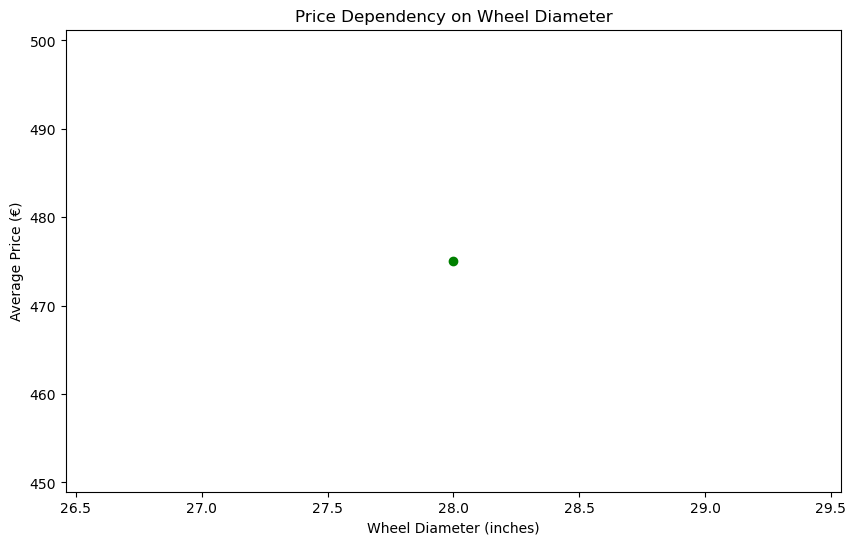

In [173]:
dfV['price'] = pd.to_numeric(dfV['price'], errors='coerce')
dfV['Ratų skersmuo:'] = dfV['Ratų skersmuo:'].astype(str)
dfV['Ratų skersmuo:'] = dfV['Ratų skersmuo:'].str.replace('"', '').str.strip(',')
dfV['Ratų skersmuo:'] = pd.to_numeric(dfV['Ratų skersmuo:'], errors='coerce')
dfV['Pavarų skaičius:'] = pd.to_numeric(dfV['Pavarų skaičius:'], errors='coerce')
dfV['Rėmas:'] = dfV['Rėmas:'].fillna("Nenurodyta")

        # Filter manufacturers with more than 2 products
manufacturer_counts = dfV['brand'].value_counts()
filtered_df = dfV[dfV['brand'].isin(manufacturer_counts[manufacturer_counts > 2].index)]


# st.subheader("Price Dependency on Wheel Diameter")
fig, ax = plt.subplots(figsize=(10, 6))
filtered_df.groupby('Ratų skersmuo:')['price'].mean().plot(kind='line', marker='o', color='green', ax=ax)
ax.set_title("Price Dependency on Wheel Diameter")
ax.set_xlabel("Wheel Diameter (inches)")
ax.set_ylabel("Average Price (€)")
# st.pyplot(fig)
plt.show()

In [178]:
dfV['Ratų skersmuo:'] = dfV['Ratų skersmuo:'].astype(str)
dfV['Ratų skersmuo:'] = dfV['Ratų skersmuo:'].str.replace('"', '').str.strip(',')
dfV['Ratų skersmuo:'] = pd.to_numeric(dfV['Ratų skersmuo:'], errors='coerce')

print(dfV['Ratų skersmuo:'])
print(dfV['Ratų skersmuo:'].unique())

0       28.0
1       20.0
2       26.0
3       26.0
4       14.0
        ... 
2032    20.0
2033    16.0
2034    29.0
2035    16.0
2036    20.0
Name: Ratų skersmuo:, Length: 2037, dtype: float64
[28.  20.  26.  14.  29.  16.  27.5 24.   nan 12.  18.  10.  19.  27.
  9.  22.  11.  17. ]


In [216]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Specifications_varleBC1"""
dfVI = pd.read_sql_query(sql, con=DB)
omgtb = dfVI.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(omgtb)

spec_key   Aizmugurējā riteņa izmērs Akumuliatoriaus įkrovimo laikas  \
product_id                                                             
1                                NaN                             NaN   
2                                NaN                             NaN   
3                                NaN                             NaN   
4                                NaN                             NaN   
5                                NaN                             NaN   
...                              ...                             ...   
1860                             NaN                             NaN   
1861                             NaN                             NaN   
1862                             NaN                             NaN   
1863                             NaN                             NaN   
1864                             NaN                             NaN   

spec_key   Amortizatorius Amžiaus grupė Amžius Apribotas Apsaug

In [217]:
unique_spec_keys = dfVI['spec_key'].unique()
print(unique_spec_keys[:1000])

['Gamintojas' 'Tipas' 'Modelis' 'Modelio pavadinimas' 'Spalva' 'Skirta'
 'Priekinis amortizatorius' 'Ratų dydis (coliais)' 'Stabdžiai'
 'Variklio galingumas (W)' 'Purvasaugiai' 'Diskiniai stabdžiai' 'Svoris'
 'Funkcija' 'Aukštis' 'Plotis' 'Gylis' 'Vaizdo plokštė' 'Tires' 'Grandine'
 'Balnas' 'Rear-hub' 'Prekės ženklas' 'Bicycle-crank' 'Bicycle-cassette'
 'Shifters' 'Front-hub' 'Pavarų skaičius' 'Mpn' 'Brake model series'
 'Shift manufacturer' 'Wheel size [inches]' 'Shifter manufacturer'
 'Transducer model series' 'Seatpost manufacturer'
 'Transducer manufacturer' 'Frame size' 'Shifting model series'
 'Pedals in the package' 'Shifter model series' 'Belpopisok'
 'Cartridge manufacturer' 'Brake manufacturer' 'Fork manufacturer'
 'Unpaved roads and terrain' 'Rėmo medžiaga' 'Handlebar manufacturer'
 'Paskirstymas' 'Fork stroke [mm]' 'Fork lock' 'Type of fork'
 'Gear configuration' 'Kelionės tikslas' 'Type of wheel'
 'Model series cartridges' 'Ilgis' 'Suderinamas_gamintojas' 'Belvyprodej'
 '

In [220]:
rem_columns = [col for col in omgtb.columns if 'rėm' in col.lower()]
omgtb['Combined_remas'] = omgtb[rem_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [221]:
print(omgtb['Combined_remas'])

product_id
1                   
2                   
3                   
4                   
5                   
            ...     
1860    Aliuminis 15
1861              58
1862    Aliuminis 15
1863    Aliuminis 17
1864       Aliuminis
Name: Combined_remas, Length: 1863, dtype: object


In [254]:
omgtb

spec_key,Aizmugurējā riteņa izmērs,Akumuliatoriaus įkrovimo laikas,Amortizatorius,Amžiaus grupė,Amžius,Apribotas,Apsauga,"Apytikslis svoris, kg (v)",Atsparus vandeniui,Aukštis,...,Šakutė,Šakės modelis,Šakės tipas,"Ūgis dviratininko, cm (v)",Combined_remas,Combined_paskirtis,Combined_tipai,Combined_skersmuo,Combined_gears,Combined_gearsI
product_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,Moterims,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,Vyrams,,27.5,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,...,NaN,NaN,NaN,NaN,,Moterims\nVyrams,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,,Vaikams,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Aliuminis 15,Vyrams,,29,18,18
1861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58,Paaugliams,,26,1,1
1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Aliuminis 15,Vyrams,,29,11,11


In [223]:
skir_columns = [col for col in omgtb.columns if 'skir' in col.lower()]
omgtb['Combined_paskirtis'] = omgtb[skir_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [224]:
print(omgtb['Combined_paskirtis'])

product_id
1                       
2               Moterims
3                 Vyrams
4       Moterims\nVyrams
5                Vaikams
              ...       
1860              Vyrams
1861          Paaugliams
1862              Vyrams
1863            Moterims
1864                    
Name: Combined_paskirtis, Length: 1863, dtype: object


In [236]:
tip_columns = [col for col in omgtb.columns if '__dviračio ti' in col.lower()]
omgtb['Combined_tipai'] = omgtb[tip_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [237]:
print(omgtb['Combined_tipai'])

product_id
1        
2        
3        
4        
5        
       ..
1860     
1861     
1862     
1863     
1864     
Name: Combined_tipai, Length: 1863, dtype: object


In [245]:
sker_columns = [col for col in omgtb.columns if 'tų dydis' in col.lower()]
omgtb['Combined_skersmuo'] = omgtb[sker_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [246]:
print(omgtb['Combined_skersmuo'])

product_id
1           
2           
3       27.5
4           
5           
        ... 
1860      29
1861      26
1862      29
1863      29
1864      20
Name: Combined_skersmuo, Length: 1863, dtype: object


In [249]:
gears_columns = [col for col in omgtb.columns if 'pavar' in col.lower()]
omgtb['Combined_gears'] = omgtb[gears_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [250]:
print(omgtb['Combined_gears'])

product_id
1         
2         
3         
4         
5         
        ..
1860    18
1861     1
1862    11
1863     8
1864     7
Name: Combined_gears, Length: 1863, dtype: object


In [252]:
gearsI_columns = [col for col in omgtb.columns if 'skaič' in col.lower()]
omgtb['Combined_gearsI'] = omgtb[gearsI_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

In [253]:
print(omgtb['Combined_gearsI'])

product_id
1         
2         
3         
4         
5         
        ..
1860    18
1861     1
1862    11
1863     8
1864     7
Name: Combined_gearsI, Length: 1863, dtype: object


In [255]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_BicyclesMax"""
dfvp1 = pd.read_sql_query(sql, con=DB)
# omg1 = dfv.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(dfvp1)

        id                                              title    price  \
0        1                Tunturi Competence F20 treniruoklis   295.99   
1        2  Dviratis Esperia 226200U Life Comfort, 54, tam...      159   
2        3  El. Dviratis Esperia E960 50 36V12.8AH 2 juoda...      659   
3        4          Elektrinis dviratis HIMO ZB20 MAX, Pilkas  1085.37   
4        5  Vaast Y/1 MOUNTIAN Jaunimas dviratis, 24'', Or...   749.99   
...    ...                                                ...      ...   
1862  1863  Vyriškas kalnų dviratis Rock Machine Manhattan...   479.99   
1863  1864  Miesto dviratis Bisan 26 Roadstar GL (PR100103...   225.99   
1864  1865  Kalnų dviratis Rock Machine 29 Blizz TRL 70-29...  1159.99   
1865  1866  Elektrinis dviratis Rock Machine 29 Crossride ...  1569.99   
1866  1867  Elektrinis dviratis APE RYDER 20 MD10 Pro Antr...  1375.99   

          brand  
0       Tunturi  
1       Esperia  
2       Esperia  
3          Himo  
4         Vaast  
...

In [256]:
selected_columns = [ 'Combined_remas', 'Combined_paskirtis', 'Combined_tipai', 'Combined_skersmuo', 'Combined_gears', 'Combined_gearsI']


merged_table1T = dfvp1.merge(omgtb[selected_columns], left_on='id', right_index=True, how='inner')


print(merged_table1T)

        id                                              title    price  \
0        1                Tunturi Competence F20 treniruoklis   295.99   
1        2  Dviratis Esperia 226200U Life Comfort, 54, tam...      159   
2        3  El. Dviratis Esperia E960 50 36V12.8AH 2 juoda...      659   
3        4          Elektrinis dviratis HIMO ZB20 MAX, Pilkas  1085.37   
4        5  Vaast Y/1 MOUNTIAN Jaunimas dviratis, 24'', Or...   749.99   
...    ...                                                ...      ...   
1859  1860  Turistinis dviratis Bisan 28 TRX8500 (PR100103...   525.99   
1860  1861  Moteriška kalnų dviratis Rock Machine Catherin...   449.99   
1861  1862  Moteriška kalnų dviratis Rock Machine Catherin...   449.99   
1862  1863  Vyriškas kalnų dviratis Rock Machine Manhattan...   479.99   
1863  1864  Miesto dviratis Bisan 26 Roadstar GL (PR100103...   225.99   

        brand Combined_remas Combined_paskirtis Combined_tipai  \
0     Tunturi                                

In [257]:
merged_table1T.to_csv('varleBicyclesI.csv', index=False)

In [258]:
df3 = pd.read_csv('varleBicyclesI.csv')

In [268]:
df3

,id,title,price,brand,Combined_remas,Combined_paskirtis,Combined_tipai,Combined_skersmuo,Combined_gears,Combined_gearsI
0,1,Tunturi Competence F20 treniruoklis,295.99,Tunturi,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Dviratis Esperia 226200U Life Comfort, 54, tam...",159.00,Esperia,NaN,Moterims,NaN,NaN,NaN,NaN
2,3,El. Dviratis Esperia E960 50 36V12.8AH 2 juoda...,659.00,Esperia,NaN,Vyrams,NaN,27.5,NaN,NaN
3,4,"Elektrinis dviratis HIMO ZB20 MAX, Pilkas",1085.37,Himo,NaN,Moterims\nVyrams,NaN,NaN,NaN,NaN
4,5,"Vaast Y/1 MOUNTIAN Jaunimas dviratis, 24'', Or...",749.99,Vaast,NaN,Vaikams,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1858,1860,Turistinis dviratis Bisan 28 TRX8500 (PR100103...,525.99,Bisan,Aliuminis 15,Vyrams,NaN,29,18,18.0
1859,1861,Moteriška kalnų dviratis Rock Machine Catherin...,449.99,Rock,58,Paaugliams,NaN,26,1,1.0
1860,1862,Moteriška kalnų dviratis Rock Machine Catherin...,449.99,Rock,Aliuminis 15,Vyrams,NaN,29,11,11.0
1861,1863,Vyriškas kalnų dviratis Rock Machine Manhattan...,479.99,Rock,Aliuminis 17,Moterims,NaN,29,8,8.0


In [262]:
df3['Combined_skersmuo'] = df3['Combined_skersmuo'].str.split(' ').str[0]

In [264]:
df3['Combined_gearsI'] = df3['Combined_gearsI'].str.split(' ').str[0]

In [266]:
df3['Combined_gearsI'] = pd.to_numeric(df3['Combined_gearsI'], errors='coerce')

In [269]:
df3['Combined_skersmuo'] = pd.to_numeric(df3['Combined_skersmuo'], errors='coerce')

In [272]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Specifications_PFridges"""
dff = pd.read_sql_query(sql, con=DB)
omg11 = dff.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(omg11)

spec_key   Antibakterinė danga: Atostogų režimas:  \
product_id                                          
1                           NaN                Ne   
2                    Nenurodyta        Nenurodyta   
3                           NaN                Ne   
4                            Ne        Nenurodyta   
5                          Taip                Ne   
...                         ...               ...   
1036                        NaN               NaN   
1037                        NaN               NaN   
1038                       Taip              Taip   
1039                        NaN        Nenurodyta   
1040                        NaN                Ne   

spec_key   Atvertų durų garsinis signalas:  Aukštis: Bendra talpa:  \
product_id                                                           
1                                       Ne    117 cm         124 l   
2                                     Taip  170.8 cm         262 l   
3                             

In [273]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_PFridges1"""
dff1 = pd.read_sql_query(sql, con=DB)
# omg11 = dff.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(dff1)

        id                                              price      brand  \
0        1  198\n00\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...    Gorenje   
1        2  305\n90\n \n€\n \n\n\n\n\nRMK kaina\n\n\n\n\t\...       Beko   
2        3  391\n00\n \n€\n \n\n\n\n\nRMK kaina\n\n\n\n\t\...       Beko   
3        4  95\n70\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n   ...    Gorenje   
4        5  236\n00\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...  Schlosser   
...    ...                                                ...        ...   
1035  1036  393\n97\n \n€\n \n\n\n\n                820\n7...       None   
1036  1037  426\n80\n \n€\n \n\n\n\n                889\n1...       None   
1037  1038  849\n00\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...   Liebherr   
1038  1039  1 070\n46\n \n€\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n...    Heinner   
1039  1040  1 127\n38\n \n€\n \n\n\n\n                1 28...      Balay   

                                                 brandI  
0                            

In [274]:
p = dff1['price'].values.tolist()
kainos = []
for l in p:
    if l:
        f = l.split('€')[0]
        kainos.append(float(f.replace('\n\n','').replace('\n','.').replace('. .','').replace(' ','')))
    else:
        kainos.append(-1)

dff1['price'] = kainos
print(dff1['price'])

0        198.00
1        305.90
2        391.00
3         95.70
4        236.00
         ...   
1035     393.97
1036     426.80
1037     849.00
1038    1070.46
1039    1127.38
Name: price, Length: 1040, dtype: float64


In [275]:
dfVII = dff1.merge(omg11 , left_on='id', right_on='product_id')
print(dfVII)

        id    price      brand  \
0        1   198.00    Gorenje   
1        2   305.90       Beko   
2        3   391.00       Beko   
3        4    95.70    Gorenje   
4        5   236.00  Schlosser   
...    ...      ...        ...   
1035  1036   393.97       None   
1036  1037   426.80       None   
1037  1038   849.00   Liebherr   
1038  1039  1070.46    Heinner   
1039  1040  1127.38      Balay   

                                                 brandI Antibakterinė danga:  \
0                                     Gorenje RF212EPW4                  NaN   
1                                     Beko RCSA270K40SN           Nenurodyta   
2                                     Beko B3RCNA364HXB                  NaN   
3                                       Gorenje R44E4W4                   Ne   
4                                   Schlosser RFD230BWE                 Taip   
...                                                 ...                  ...   
1035  Havato 3,2 Cu.Ft mini šal

In [276]:
dfVII.to_csv('piguFridgesI.csv', index=False)

In [277]:
dfVII = pd.read_csv('piguFridgesI.csv')

In [278]:
dfVII

,id,price,brand,brandI,Antibakterinė danga:,Atostogų režimas:,Atvertų durų garsinis signalas:,Aukštis:,Bendra talpa:,Daržovių stalčius:,...,Visos šio ženklo prekės:,Šaldiklio atitirpinimas:,Šaldiklio efektyvumas be elektros srovės:,Šaldiklio talpa:,Šaldiklio valdymas:,Šaldytuvo atitirpinimas:,Šaldytuvo talpa:,Šaldytuvo tipas:,Šalto vandens tiekimo sistema:,Žemos temperatūros kamera:
0,1,198.00,Gorenje,Gorenje RF212EPW4,NaN,Ne,Ne,117 cm,124 l,NaN,...,Visos Gorenje prekės,Rankinis atitirpinimas,9 val.,28 l,NaN,Rankinis atitirpinimas,96 l,Šaldytuvas su šaldikliu viršuje,NaN,NaN
1,2,305.90,Beko,Beko RCSA270K40SN,Nenurodyta,Nenurodyta,Taip,170.8 cm,262 l,Taip,...,Visos Beko prekės,Automatinis atitirpinimas,-,87 l,Mechaninis,Rankinis atitirpinimas,175 l,Šaldytuvas su šaldikliu apačioje,Ne,Nenurodyta
2,3,391.00,Beko,Beko B3RCNA364HXB,NaN,Ne,NaN,186.5 cm,316 l,NaN,...,Visos Beko prekės,Automatinis atitirpinimas,11 val.,106 l,NaN,Automatinis atitirpinimas,210 l,Šaldytuvas su šaldikliu apačioje,NaN,Nenurodyta
3,4,95.70,Gorenje,Gorenje R44E4W4,Ne,Nenurodyta,Ne,50 cm,45 l,Ne,...,Visos Gorenje prekės,Be šaldiklio,Nenurodyta val.,Nenurodyta l,NaN,Rankinis atitirpinimas,45 l,Mini šaldytuvas,Ne,Ne
4,5,236.00,Schlosser,Schlosser RFD230BWE,Taip,Ne,NaN,152 cm,170 l,Taip,...,Visos Schlosser prekės,Rankinis atitirpinimas,10 val.,50 l,Mechaninis,Automatinis atitirpinimas,120 l,Šaldytuvas su šaldikliu apačioje,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1036,393.97,NaN,"Havato 3,2 Cu.Ft mini šaldytuvas su šaldikliu,...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,1037,426.80,NaN,WANAI Retro mini šaldytuvas kompaktiškas šaldy...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,1038,849.00,Liebherr,Liebherr Rsfe 5220-20,Taip,Taip,Taip,185.5 cm,399 l,Taip,...,Visos Liebherr prekės,Be šaldiklio,Nenurodyta val.,Nenurodyta l,Nenurodyta,Automatinis atitirpinimas,399 l,Šaldytuvas be šaldiklio,Ne,Ne
1038,1039,1070.46,Heinner,Heinner HCNF-V291SWDE++,NaN,Nenurodyta,NaN,186 cm,295 l,NaN,...,Visos Heinner prekės,Automatinis atitirpinimas,Nenurodyta val.,88 l,NaN,Automatinis atitirpinimas,207 l,Šaldytuvas su šaldikliu apačioje,NaN,NaN


In [281]:
dfVII['Bendra talpa:'] = dfVII['Bendra talpa:'].str.replace('l','').str.split(' ').str[0]

In [285]:
dfVII['Energijos sąnaudos per metus:'] = dfVII['Energijos sąnaudos per metus:'].str.replace('kWh','').str.split(' ').str[0]

In [ ]:
dfVII['Maksimalus triukšmo lygis:'] = dfVII['Maksimalus triukšmo lygis:'].str.replace('dB','').str.split(' ').str[0]

In [282]:
dfVII['Pakuotės išmatavimai ir svoris (1):'] = dfVII['Pakuotės išmatavimai ir svoris (1):'].str.replace('kg','').str.split('m,').str[0]

In [283]:
print(dfVII['Pakuotės išmatavimai ir svoris (1):'])

0       0,52 x 0,55 x 1,26 
1       1,73 x 0,56 x 0,55 
2       0,77 x 0,66 x 1,93 
3       0,49 x 0,47 x 0,53 
4        0,59 x 0,7 x 1,58 
               ...         
1035      0,1 x 0,15 x 0,1 
1036      0,1 x 0,15 x 0,1 
1037       0,7 x 0,6 x 1,9 
1038    0,65 x 0,69 x 1,96 
1039     0,83 x 0,72 x 1,9 
Name: Pakuotės išmatavimai ir svoris (1):, Length: 1040, dtype: object


In [ ]:
dfII['brand']
dfII['Montavimo tipas:']
dfII['Šaldytuvo tipas:']
dfII['Energijos klasė:']
dfII['Valdymas:']
dfII['Spalva:']

In [288]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Specifications_varleFG1"""
dff2 = pd.read_sql_query(sql, con=DB)
omg12 = dff2.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(omg12)

spec_key   0° skyrius  *** 4 žvaigždučių šaldymo kamera  \
product_id                                                
1                      NaN                          NaN   
2                      NaN                          NaN   
3                      NaN                          NaN   
4                      NaN                          NaN   
5                      NaN                          NaN   
...                    ...                          ...   
1223                   NaN                          NaN   
1224                   NaN                          NaN   
1225                   NaN                          NaN   
1226                   NaN                          NaN   
1227                   NaN                          NaN   

spec_key   4 žvaigždučių šaldymo kameros stiklinių plokščių skaičius  \
product_id                                                             
1                                                         NaN          
2               

In [289]:
unique_spec_keys = dff2['spec_key'].unique()
print(unique_spec_keys[:1000])

['Gamintojas' 'Tipas' 'Montavimo tipas' 'Energijos klasė' 'Talpa (L)'
 'Aukštis (cm)' 'Modelio pavadinimas' 'Spalva' 'Modelis'
 'Bešerkšnė sistema' 'Gylis [cm]' 'Pakeisti durų atidarymo kryptį'
 'Automatinis atitirpinimas' 'Plotis [cm]' 'Aukštis [cm]'
 'Šaldiklio stalčių/lentynų skaičius' 'Ledukų generatorius'
 'Oro valymo filtras' 'Apšvietimas' 'Naudinga šaldytuvo talpa' 'Svoris'
 'Žemiausia darbinė temperatūra'
 'Naujoji energijos vartojimo efektyvumo klasė' 'Vėsusis stalčius'
 'Greito užšaldymo funkcija šaldiklyje' 'Keičiama durų atidarymo kryptis'
 'Atostogų funkcija' 'Gylis' 'Plotis' 'Aukštis'
 'Metinės energijos sąnaudos' 'Minkštas durelių uždarymas'
 'Šaldiklio šaldymo temperatūra' 'Butelių lentyna'
 'Individualus lentynėlių išdėstymas durelėse' 'Ventiliatorius'
 'Klimato klasė' 'Dalijama stiklo lentyna' 'Metalizuota galinė sienelė'
 'Standartizuotas plotis' 'Greitas vėsinimas šaldytuve' 'Valdymas'
 'Atvirų durų signalas'
 'Šalčio išlaikymo trukmė šaldiklyje nutrūkus elektros ti

In [292]:
print(omg12['Montavimo tipas'])

product_id
1       Laisvai statomi
2       Laisvai statomi
3       Laisvai statomi
4           Įmontuojami
5           Įmontuojami
             ...       
1223                NaN
1224        Įmontuojami
1225    Laisvai statomi
1226    Laisvai statomi
1227                NaN
Name: Montavimo tipas, Length: 1227, dtype: object


In [293]:
omg12

spec_key,0° skyrius ***,4 žvaigždučių šaldymo kamera,4 žvaigždučių šaldymo kameros stiklinių plokščių skaičius,AC įvesties dažnis,AC įvesties įtampa,Abpusēji veramās durvis,Adjustable-shelves,Agregatų skaičius,Aktyvintos anglies filtras,Aliarmas dėl nutrūkusio elektros tiekimo,...,„drysafe“,„flexsystem“ skaičius,„frostcontrol“,„išmaniųjų įrenginių dėžutė“,„nofrost“,„openstage“ stalčiai,„softsystem“,„variobox“ skaičius,„variosafe“,„variospace“
product_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
DB = sqlite3.connect(r"C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\varleDrons.db")
C = DB.cursor()
#sql užklausa per pandas sql_query
sql="""select * from Product_FridgesMax"""
dff3 = pd.read_sql_query(sql, con=DB)
# omg12 = dff2.groupby('product_id').nth(slice(0,60)).pivot(index='product_id', columns='spec_key', values='spec_value')
print(dff3)

        id                                              title    price  \
0        1                  Šaldytuvas Sharp SJ-FTB01ITXSE-EU      219   
1        2          Šaldytuvas Hisense RR106D4CBE 85cm Juodas      165   
2        3  Šaldytuvas Bosch KGN36NWEA 2 serija, Baltos sp...      450   
3        4                        Šaldytuvas Haier HLE 172 DE      450   
4        5  Įmontuojamasis šaldytuvas Bosch KIN86NSE0 NoFrost      777   
...    ...                                                ...      ...   
1221  1222  Šaldytuvas Bosch Bosch šaldytuvo ir šaldiklio ...   959.99   
1222  1223                     Šaldytuvas HISENSE RB3B250SAWE   589.99   
1223  1224  LIEBHERR SRBsfc 5220 Freestanding Šaldytuvas w...  1299.99   
1224  1225  LIEBHERR CTele 2531 Šaldytuvas su šaldikliu vi...   489.99   
1225  1226              Siemens Siemens KG 49EAICA šaldytuvas   995.99   

         brand  
0        Sharp  
1      Hisense  
2         None  
3        Haier  
4         None  
...      

In [296]:
selected_columns = [ 'Montavimo tipas', 'Energijos klasė', 'Valdymas', 'Spalva', 'Talpa (L)', 'Tipas', 'Aukštis (cm)', 'Plotis', 'Gylis', 'Metinės energijos sąnaudos', 'Garso lygio klasė', 'Gamintojas']


merged_table3T = dff3.merge(omg12[selected_columns], left_on='id', right_index=True, how='inner')


print(merged_table3T)

        id                                              title    price  \
0        1                  Šaldytuvas Sharp SJ-FTB01ITXSE-EU      219   
1        2          Šaldytuvas Hisense RR106D4CBE 85cm Juodas      165   
2        3  Šaldytuvas Bosch KGN36NWEA 2 serija, Baltos sp...      450   
3        4                        Šaldytuvas Haier HLE 172 DE      450   
4        5  Įmontuojamasis šaldytuvas Bosch KIN86NSE0 NoFrost      777   
...    ...                                                ...      ...   
1221  1222  Šaldytuvas Bosch Bosch šaldytuvo ir šaldiklio ...   959.99   
1222  1223                     Šaldytuvas HISENSE RB3B250SAWE   589.99   
1223  1224  LIEBHERR SRBsfc 5220 Freestanding Šaldytuvas w...  1299.99   
1224  1225  LIEBHERR CTele 2531 Šaldytuvas su šaldikliu vi...   489.99   
1225  1226              Siemens Siemens KG 49EAICA šaldytuvas   995.99   

         brand  Montavimo tipas Energijos klasė Valdymas Spalva Talpa (L)  \
0        Sharp  Laisvai statomi   

In [297]:
merged_table3T.to_csv('varleFridgesI.csv', index=False)

In [418]:
dfIX = pd.read_csv('varleFridgesI.csv')

In [406]:
dfIX

,id,title,price,brand,Montavimo tipas,Energijos klasė,Valdymas,Spalva,Talpa (L),Tipas,Aukštis (cm),Plotis,Gylis,Metinės energijos sąnaudos,Garso lygio klasė,Gamintojas
0,1,Šaldytuvas Sharp SJ-FTB01ITXSE-EU,219.00,Sharp,Laisvai statomi,E,NaN,NaN,213.0,Su kamera viršuje,145.0,NaN,NaN,NaN,NaN,Sharp
1,2,Šaldytuvas Hisense RR106D4CBE 85cm Juodas,165.00,Hisense,Laisvai statomi,E,NaN,Juoda,82.0,Mini\n\nSu kamera viduje,85.0,NaN,NaN,NaN,NaN,Hisense
2,3,"Šaldytuvas Bosch KGN36NWEA 2 serija, Baltos sp...",450.00,NaN,Laisvai statomi,E,NaN,Balta,302.0,Su kamera apačioje,186.0,NaN,NaN,NaN,NaN,Bosch
3,4,Šaldytuvas Haier HLE 172 DE,450.00,Haier,Įmontuojami,F,NaN,Balta,316.0,Be kameros,1.739,NaN,NaN,NaN,NaN,Haier
4,5,Įmontuojamasis šaldytuvas Bosch KIN86NSE0 NoFrost,777.00,NaN,Įmontuojami,E,NaN,Balta,76.0,Su kamera apačioje,177.0,NaN,NaN,NaN,NaN,Bosch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1222,Šaldytuvas Bosch Bosch šaldytuvo ir šaldiklio ...,959.99,Bosch,NaN,NaN,NaN,Balta,NaN,NaN,145,NaN,NaN,NaN,NaN,Sharp
1222,1223,Šaldytuvas HISENSE RB3B250SAWE,589.99,Hisense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bosch
1223,1224,LIEBHERR SRBsfc 5220 Freestanding Šaldytuvas w...,1299.99,Liebherr,Įmontuojami,NaN,NaN,NaN,NaN,Su kamera apačioje,NaN,NaN,NaN,NaN,NaN,Hisense
1224,1225,LIEBHERR CTele 2531 Šaldytuvas su šaldikliu vi...,489.99,Liebherr,Laisvai statomi,NaN,NaN,NaN,NaN,NaN,1.927,NaN,NaN,NaN,NaN,Liebherr


In [419]:
print(dfIX['Tipas'].unique())

['Su kamera viršuje' 'Mini\n\nSu kamera viduje' 'Su kamera apačioje'
 'Be kameros' 'Šaldytuvas su apatiniu šaldikliu' 'Mini' 'Su kamera viduje'
 'Fridge without freezer' 'Laisvai pastatomas' nan 'Vitrina'
 'Šaldytuvas-Šaldytuvas' 'Pastatas' 'Fridge with freezer inside'
 'Šaldytuvai su šaldikliu apačioje' 'Fridge with top freezer' 'Šaldytuvas'
 'Mini\nSu kamera viduje' 'Su kamera' 'Vienaduriai' 'Dviduriai'
 'Šaldytuvai su šaldymo kamera' 'Šaldytuvai su šaldikliu viršuje'
 'Mažo prietaiso priedas' 'Lentynėlė' 'Mini\nBe kameros' 'Saugykla'
 'Šaldikliai' 'Mini\n\nBe kameros' 'Side by side' 'Stačiai']


In [420]:
tipas = {'Mini\n\nSu kamera viduje': 'Mini', 'Mini\n\nBe kameros': 'Mini', 'Mini\nBe kameros': 'Mini', 'Mini\nSu kamer viduje': 'Mini', 'Mini': 'Mini',
        'Su kamera viršuje': 'Šaldytuvas su šaldikliu viršuje', 'Fridge with top freezer': 'Šaldytuvas su šaldikliu viršuje', 'Šaldytuvai su šaldikliu viršuje': 'Šaldytuvas su šaldikliu viršuje',
        'Su kamera apačioje': 'Šaldytuvas su šaldikliu apačioje', 'Fridge with bottom freezer': 'Šaldytuvas su šaldikliu apačioje', 'Šaldytuvai su šaldikliu apačioje': 'Šaldytuvas su šaldikliu apačioje', 'Šaldytuvas su apatiniu šaldikliu': 'Šaldytuvas su šaldikliu apačioje',
        'Be kameros': 'Šaldytuvas be šaldiklio', 'Fridge without freezer': 'Šaldytuvas be šaldiklio', 'Šaldytuvai be šaldiklio': 'Šaldytuvas be šaldiklio', 'Šaldytuvas be šaldiklio': 'Šaldytuvas be šaldiklio',
        'Su kamera viduje': 'Šaldytuvas su šaldikliu viduje', 'Fridge with freezer inside': 'Šaldytuvas su šaldikliu viduje', 'Šaldytuvai su šaldymo kamera': 'Šaldytuvas su šaldikliu viduje', 'Su kamera': 'Šaldytuvas su šaldikliu viduje', 'Šaldikliai': 'Šaldytuvas su šaldikliu viduje',
        'Dviduriai': 'Dviejų durų',
        'Vitrina': 'Vitrina',
        'Laisvai pastatomas' : 'Kiti', 'Pastatas': 'Kiti', 'Vienaduriai': 'Kiti', 'Mažo prietaiso priedas': 'Kiti', 'Lentynėlė': 'Kiti', 'Saugykla': 'Kiti', 'Side by side': 'Kiti', 'Stačiai': 'Kiti'}

dfIX['Tipas'] = dfIX['Tipas'].map(tipas)

dfIX['Tipas'] = dfIX['Tipas'].fillna('Kiti')
print(dfIX['Tipas'].unique())

['Šaldytuvas su šaldikliu viršuje' 'Mini'
 'Šaldytuvas su šaldikliu apačioje' 'Šaldytuvas be šaldiklio'
 'Šaldytuvas su šaldikliu viduje' 'Kiti' 'Vitrina' 'Dviejų durų']


In [425]:
max_value = dfIX['Talpa (L)'].max()

dfIX = dfIX[dfIX['Talpa (L)'] != max_value]



In [ ]:

dfIX['Aukštis (cm)'] = pd.to_numeric(dfIX['Aukštis (cm)'], errors='coerce')


top_four_max_values = dfIX['Aukštis (cm)'].nlargest(4)


dfIX = dfIX[~dfIX['Aukštis (cm)'].isin(top_four_max_values)]

In [428]:
dfIX['Valdymas'].unique()

array([nan, 'Internal touch control LCD', 'Elektroninė', 'Mechaninis',
       'Electronical with LCD', 'Vidinis elektroninis valdymas',
       'Elektroninis', 'Jutiklinis valdymas', 'Touch control with LCD',
       'External electronic control', 'External touch control LCD',
       'jutiklinis ekranas „Touch“', 'Elektroninė su LCD',
       'Jutiklinė elektronika', 'išplėstinė vartotojo sąsaja'],
      dtype=object)

In [ ]:
valdymas = { 'Internal touch control LCD': 'Electroninis Sensorinis', 'Electronical with LCD': 'Electroninis Sensorinis', 'Touch control with LCD': 'Electroninis Sensorinis', 'External touch control LCD': 'Electroninis Sensorinis', 'Elektroninė su LCD': 'Electroninis Sensorinis', 'jutiklinis ekranas „Touch“': 'Electroninis Sensorinis', 'Jutiklinė elektronika': 'Electroninis Sensorinis', 'Jutiklinis valdymas': 'Electroninis Sensorinis',
             'Elektroninė': 'Elektroninis',  'Vidinis elektroninis valdymas': 'Elektroninis', 'Elektroninis': 'Elektroninis', 'External electronic control': 'Elektroninis',
              'Mechaninis': 'Mechaninis', 'išplėstinė vartotojo sąsaja': 'Mechaninis'}

dfIX['Valdymas'] = dfIX['Valdymas'].map(valdymas)

dfIX['Valdymas'] = dfIX['Valdymas'].fillna('Kita')



In [407]:
print(dfIX['Montavimo tipas'].unique())

['Laisvai statomi' 'Įmontuojami' 'Pastatytas' nan 'Integruota'
 'Laisvai pastatoma' 'Laisvai pastatomos' 'laisvai pastatoma' 'Montuojami'
 'įmontuojama' 'Pilnai įmontuojama']


In [ ]:
montavimo_tipas = {
    'Laisvai statomi': 'Statomas',
    'Pastatytas': 'Statomas',
    'Laisvai pastatoma': 'Statomas',
    'Laisvai pastatomos': 'Statomas',
    'laisvai pastatoma': 'Statomas',
    'Įmontuojami': 'Montuojamas',
    'Integruota': 'Montuojamas',
    'Montuojami': 'Montuojamas',
    'įmontuojama': 'Montuojamas',
    'Pilnai įmontuojama': 'Montuojamas'
}


dfIX['Montavimo tipas'] = dfIX['Montavimo tipas'].map(montavimo_tipas)


dfIX['Montavimo tipas'] = dfIX['Montavimo tipas'].fillna('Kita')

print(dfIX['Montavimo tipas'].unique())

['Statomas' 'Montuojamas' 'Kita']


In [ ]:
dfIX['Metinės energijos sąnaudos'] = dfIX['Metinės energijos sąnaudos'].str.replace('kWh','').str.split(' ').str[0]

In [402]:
dfIX['Gylis'] = dfIX['Gylis'].str.replace('cm','').str.replace('mm', '').str.replace(',','.').str.split(' ').str[0]

In [403]:
dfIX['Gylis'] = pd.to_numeric(dfIX['Gylis'], errors='coerce')  # Convert to numeric
dfIX = dfIX[~dfIX['Gylis'].astype(str).str.contains(r'^\d{3}\.', na=False)]

In [404]:
dfIX['Plotis'] = dfIX['Plotis'].str.replace('cm','').str.replace('mm', '').str.replace(',','.').str.split(' ').str[0]

In [378]:
x = dfIX['Gylis'].values.tolist()
gylis = []
for l in x:
    l_str = str(l)
    try:
        if len(l_str) == 3:
            gylis.append(float(l_str[:2] + '.' + l_str[-1]))
        else:
            gylis.append(float(l_str))
    except ValueError:
        gylis.append(float('nan'))

In [385]:
x = dfIX['Gylis'].values.tolist()  # Assuming 'Gylis' contains the column data
gylis = []

for l in x:
    try:
        l_str = str(l).strip()  # Convert to string and remove any surrounding whitespace
        if l_str.isdigit() and len(l_str) == 3:  # Check if it's a three-digit number
            gylis.append(float(l_str[:2] + '.' + l_str[-1]))  # Move the decimal
        else:
            gylis.append(float(l))  # Keep the original number if not a three-digit integer
    except ValueError:
        gylis.append(float('nan'))

In [395]:
y = 777.0 
y_str = str(x)
j = []
for l in y_str:
    if len(l) == 3:
        z = (l[:2] + '.' + l[-1]).join('')
        # h =''.join(z)
        j.append(z)
    else:
        j.append(l)
print(j)
# if len(y_str) == 3:
            # pass
# print((y_str[:2] + '.' + y_str[-1]))
    
# print(float(y_str))

['[', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', "'", '5', '4', '.', '6', "'", ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', "'", '5', '5', '.', '0', "'", ',', ' ', 'n', 'a', 'n', ',', ' ', "'", '5', '9', '.', '2', "'", ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', "'", '4', '7', "'", ',', ' ', "'", '5', '4', '.', '9', "'", ',', ' ', "'", '5', '4', '.', '9', "'", ',', ' ', "'", '5', '4', '.', '5', "'", ',', ' ', 'n', 'a', 'n', ',', ' ', "'", '6', '6', '3', "'", ',', ' ', "'", '4', '8', '.', '6', "'", ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', "'", '5', '5', "'", ',', ' ', "'", '5', '5', '.', '0', "'", ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', 'n', 'a', 'n', ',', ' ', "'", '5', '9', '.', '0', "'",

In [396]:
y_str = str(x)  # Convert the input list to a string (not ideal for processing individual numbers)
j = []

for l in x:  # Iterate through the original list
    l_str = str(l).strip()  # Convert each value to a string and strip whitespace
    if l_str.isdigit() and len(l_str) == 3:  # Check if it's a three-digit number
        z = l_str[:2] + '.' + l_str[-1]  # Move the decimal point
        j.append(z)  # Append the transformed value
    else:
        j.append(l_str)  # Append unchanged values

# If you want the result as a single joined string, do this:
result = ', '.join(j)  # Join all elements in the list with a comma and space

print(result)

nan, nan, nan, nan, nan, nan, 54.6, nan, nan, nan, nan, nan, 55.0, nan, 59.2, nan, nan, 47, 54.9, 54.9, 54.5, nan, 66.3, 48.6, nan, nan, 55, 55.0, nan, nan, nan, nan, nan, 59.0, nan, 71.6, nan, nan, nan, nan, nan, 65.5, 0.6, 54.6, 0.63, nan, nan, 54.9, 45, 0.6, 0.78, nan, nan, 65.5, 57.5, 45.0, nan, 54.5, nan, nan, nan, nan, nan, nan, nan, nan, 63.5, nan, nan, 59.5, 54.5, 50.0, nan, 57.4, nan, 55.7, nan, 58.0, 55.0, nan, nan, 68.2, nan, nan, 55.7, 54.5, 55.7, 65.5, 54, nan, nan, 48.7, nan, nan, nan, 55.0, nan, 57.4, nan, 54.9, 61.5, nan, nan, 41.8, 55.0, 47, 54.9, nan, 63.0, nan, nan, 56.2, 47.9, 49.5, 54.5, 57.4, 65.8, 57.4, nan, nan, 65.5, nan, nan, 55.0, 65.5, nan, 54.0, nan, nan, 54.5, nan, nan, nan, 55.0, 66.3, 55.8, 54.5, nan, nan, 65.0, 55.0, nan, 65.0, nan, 66.3, nan, 61.5, 54.9, 57.4, nan, nan, nan, 54.9, 55.0, 57.4, 54.7, 65.0, nan, 64.5, 58.5, nan, nan, nan, 60, nan, nan, 51.6, 54.9, 45, 54.2, 66.7, 63.0, nan, 0.5, 45.5, 57, nan, nan, 58.5, 49, nan, 67.8, nan, 65.5, 69.4, na

In [382]:
print(x)

[nan, nan, nan, nan, nan, nan, '54.6', nan, nan, nan, nan, nan, '55.0', nan, '59.2', nan, nan, '47', '54.9', '54.9', '54.5', nan, '663', '48.6', nan, nan, '55', '55.0', nan, nan, nan, nan, nan, '59.0', nan, '71.6', nan, nan, nan, nan, nan, '65.5', '0.6', '54.6', '0.63', nan, nan, '54.9', '45', '0.6', '0.78', nan, nan, '655', '57.5', '45.0', nan, '54.5', nan, nan, nan, nan, nan, nan, nan, nan, '63.5', nan, nan, '59.5', '54.5', '500', nan, '57.4', nan, '55.7', nan, '580', '55.0', nan, nan, '68.2', nan, nan, '55.7', '54.5', '55.7', '655', '54', nan, nan, '48.7', nan, nan, nan, '55.0', nan, '574', nan, '54.9', '615', nan, nan, '41.8', '55.0', '47', '54.9', nan, '63.0', nan, nan, '56.2', '479', '49.5', '54.5', '57.4', '65.8', '574', nan, nan, '655', nan, nan, '55.0', '655', nan, '54.0', nan, nan, '54.5', nan, nan, nan, '55.0', '66.3', '55.8', '545', nan, nan, '65.0', '55.0', nan, '65.0', nan, '66.3', nan, '61.5', '54.9', '574', nan, nan, nan, '54.9', '55.0', '574', '54.7', '65.0', nan, '645

In [379]:
print(gylis)

[nan, nan, nan, nan, nan, nan, 54.6, nan, nan, nan, nan, nan, 55.0, nan, 59.2, nan, nan, 47.0, 54.9, 54.9, 54.5, nan, 66.3, 48.6, nan, nan, 55.0, 55.0, nan, nan, nan, nan, nan, 59.0, nan, 71.6, nan, nan, nan, nan, nan, 65.5, nan, 54.6, 0.63, nan, nan, 54.9, 45.0, nan, 0.78, nan, nan, 65.5, 57.5, 45.0, nan, 54.5, nan, nan, nan, nan, nan, nan, nan, nan, 63.5, nan, nan, 59.5, 54.5, 50.0, nan, 57.4, nan, 55.7, nan, 58.0, 55.0, nan, nan, 68.2, nan, nan, 55.7, 54.5, 55.7, 65.5, 54.0, nan, nan, 48.7, nan, nan, nan, 55.0, nan, 57.4, nan, 54.9, 61.5, nan, nan, 41.8, 55.0, 47.0, 54.9, nan, 63.0, nan, nan, 56.2, 47.9, 49.5, 54.5, 57.4, 65.8, 57.4, nan, nan, 65.5, nan, nan, 55.0, 65.5, nan, 54.0, nan, nan, 54.5, nan, nan, nan, 55.0, 66.3, 55.8, 54.5, nan, nan, 65.0, 55.0, nan, 65.0, nan, 66.3, nan, 61.5, 54.9, 57.4, nan, nan, nan, 54.9, 55.0, 57.4, 54.7, 65.0, nan, 64.5, 58.5, nan, nan, nan, 60.0, nan, nan, 51.6, 54.9, 45.0, 54.2, 66.7, 63.0, nan, nan, 45.5, 57.0, nan, nan, 58.5, 49.0, nan, 67.8, 

In [309]:
dfIX['Gylis'] = pd.Series(gylis)
